### Teetering Tetrahedra 
***

The August 11th Riddler Classic from [FiveThirtyEight](https://fivethirtyeight.com/features/can-you-plug-the-white-house-leak/) is as follows: 

> Fans of Dungeons & Dragons will have fond feelings for four-sided dice, which are shaped like regular tetrahedrons. Some might have noticed, in those long hours of fantasy battle, that if you touch five of these pyramids face-to-face-to-face, they come agonizingly close to forming a closed pentagon. Alas, there remains a tiny angle of empty space left between two of the pyramids.

> ![alt text](https://espnfivethirtyeight.files.wordpress.com/2017/08/roeder-riddler-0809-1.png?quality=90&strip=info&w=575&ssl=1 "lololololo")


> What is the measure of that angle?



We can fairly easily find the angle between the two tetrahedron faces of interest provided that we know the coordinates of all of the vertices involved.  One straightforward way to do this is to find the vectors normal (orthogonal) to the shaded green and orange faces shown above, and then compute the angle between these normal vectors, e.g. with 

$$
\theta = \arccos \left( \frac{{\bf n}_{green} \cdot {\bf n}_{orange}}{\|{\bf n}_{green}\|\|{\bf n}_{orange}\|} \right)
$$

The more complicated problem is determining the coordinates of the vertices of each tetrahedron.  One way to accomplish this is to first think about setting the tetrahedra on the $xy$-plane such that they each have a vertex at the origin and each share a side with their neighbor.  This configuration (using tetrahedra with side length 1) looks as follows when viewed from above:  

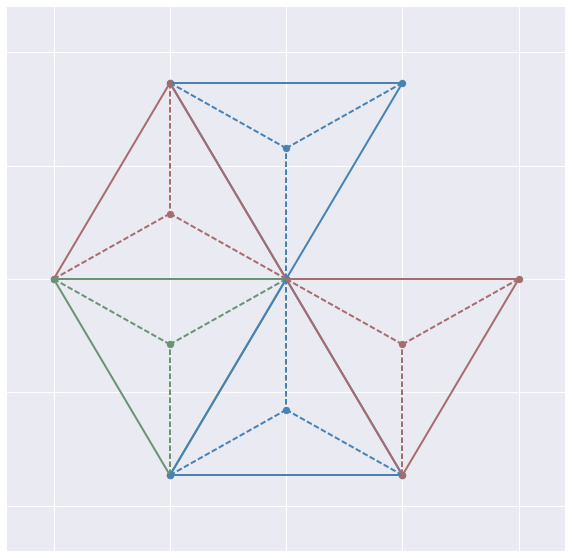

In [32]:
megaTet = TetUnion()
megaTet.plot()

To put things in the desired configuration we need to rotate each tetrahedron until it's top vertex coincides with the point $(0,0,1)$ while keeping the vertex at the origin in place. We can do this by applying a sequence of elementary transformations to the vertices of each tetrahedron.  For instance, one tetrahedron at a time, we can rotate vertically until the top vertex is in place, and then rotate laterally until neighboring tetrahedrons again share a common side.  

The following sequence shows this process: 

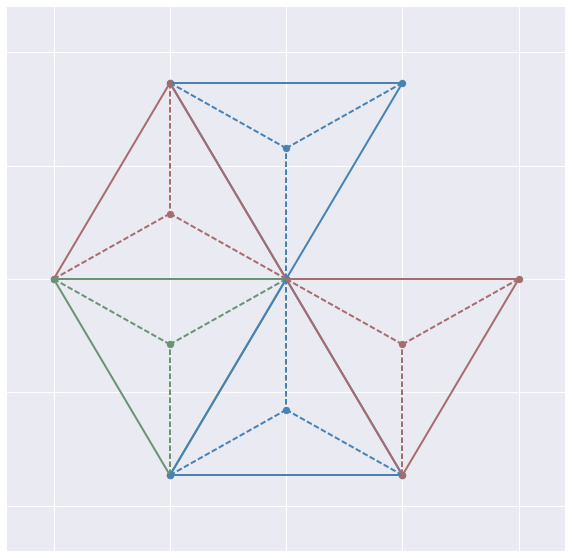

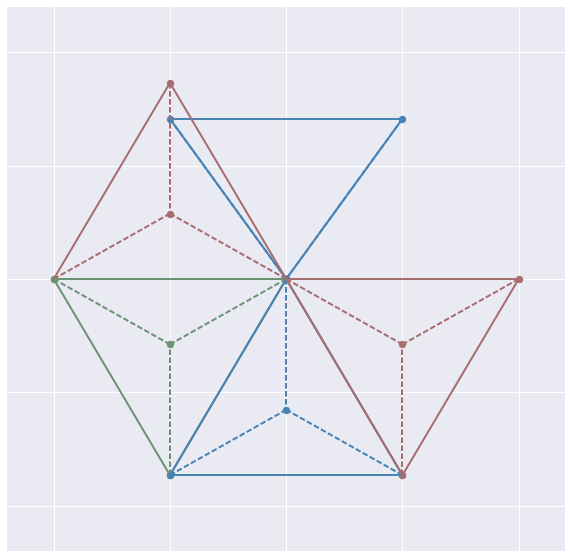

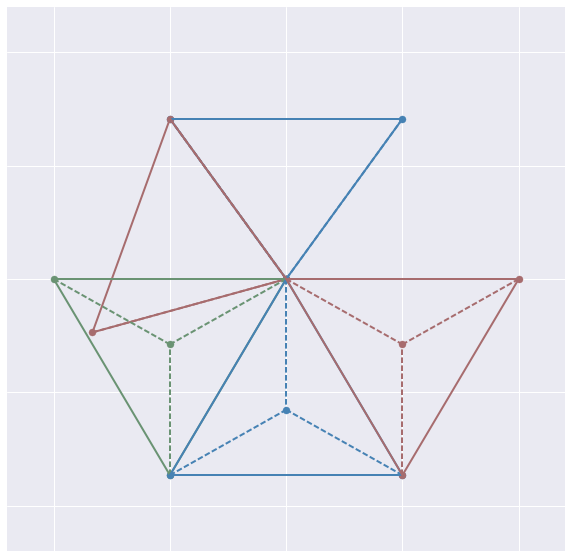

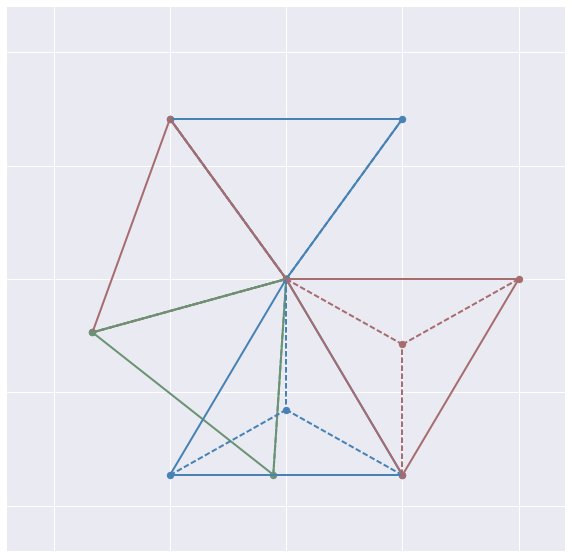

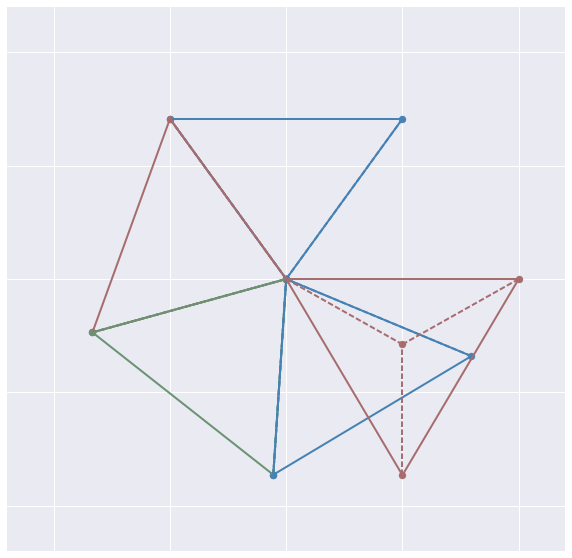

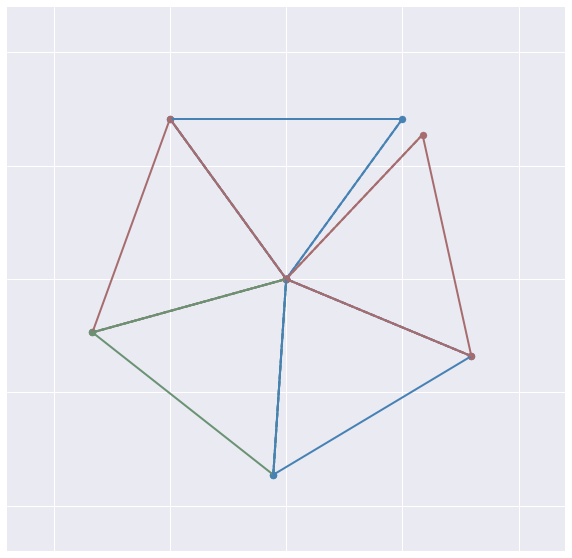

In [33]:
megaTet.fold(showPlot=True)

Once we have the final configuration we can easily compute the angle between the not-quite-touching faces using the formula given previously.  The following function accomplishes this. 

In [34]:
findAngle()

angle in radians: 0.128388
angle in degrees: 7.356103


It appears that the angle of interest is approximately **7.356 degrees** (or 0.1284 radians). 

<br><br><br><br>
## Helper Functions
***

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt 
%matplotlib inline

class Tetrahedron(object):
    '''
    Class representing a regular tetrahedron.  New instantiations
    are defined as a representative tetrahedron.  User can then 
    use rotate method to put tetrahedron in position. 
    '''
    
    def __init__(self,length=1): 
        '''
        Initialize representative tetrahedron 
        '''
        self.length = length 
        self.verts = []
        self.verts.append(self.length*np.array([np.cos(np.pi/3), np.sin(np.pi/3), 0.0]))
        self.verts.append(self.length*np.array([np.cos(2*np.pi/3), np.sin(2*np.pi/3), 0.0]))
        self.verts.append(np.array([0.,0.,0.]))
        self.verts.append(self.length*np.array([0, 1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)]))
        
    def show(self):
        '''
        Print vertex coordinates of tetrahedron 
        '''
        rstr = "\n"
        for ii, v in enumerate(self.verts):
            for val in v:
                rstr += " {: .8f}".format(val)
            rstr+= "\n"
        print(rstr)
        
    def rotate(self, angle, axis):
        '''
        Rotate tetrahedron angle (in radians) about given axis 
        '''
        c = np.cos(angle)
        s = np.sin(angle)
        if axis=="x":
            Q = np.array([
              [ 1.0,  0.0,  0.0], 
              [ 0.0,    c,   -s], 
              [ 0.0,    s,    c], 
            ])
        elif axis=="y":
            Q = np.array([
              [   c,  0.0,    s], 
              [ 0.0,  1.0,  0.0], 
              [  -s,  0.0,    c], 
            ])
        elif axis=="z":
            Q = np.array([
              [ c, -s,  0.0], 
              [ s,  c,  0.0], 
              [ 0,  0,  1.0], 
            ])
            
        for ii in range(len(self.verts)):
            self.verts[ii] = np.dot(Q, self.verts[ii])
            

class TetUnion(object):
    '''
    Class to model a collection of tetrahedrons 
    '''
    
    def __init__(self, tets=[]):
        '''
        Initialize collection from user provided list 
        of Tetrahedron objects. If no list is provided
        then initialize 5 tetrahedrons sitting flat
        in the xy-plane and each sharing a vertex
        at the origin. 
        '''
        self.tets = [] 
        if len(tets) > 0: 
            for t in tet_list: 
                self.tets.append(t)
        else: 
            for ii in range(5):
                t = Tetrahedron(1.0)
                t.rotate(ii*np.pi/3, "z")
                self.tets.append(t)

    def show(self):
        '''
        Print vertex coordinates of of each tetrahedron 
        in the union. 
        '''
        print("\n-----------------------------------")
        for t in self.tets:
            t.show()
        print("-----------------------------------\n")
        
    def fold(self, showPlot=False):
        '''
        Fold up initial configuration so that tets 
        now share vertices at origin and at (0,0,1)
        '''
        toMatch = None 
        if showPlot: 
            self.plot()
        for ii, t in enumerate(self.tets):
            xy_angle = -ii*np.pi/3
            t.rotate(xy_angle, "z")
            xz_angle = np.arccos(np.dot(np.array([0.0, 0.0, 1.0]), t.verts[-1]))
            t.rotate(xz_angle, "x")
            if toMatch is not None: 
                t.rotate(-xy_angle, "z")
                v1 = toMatch[:2]/np.linalg.norm(toMatch[:2])
                v2 = t.verts[0][:2]/np.linalg.norm(t.verts[0][:2])
                xy_angle = np.arccos(np.dot(v1, v2))
                t.rotate(xy_angle, "z")
            toMatch = t.verts[1]
            if showPlot: 
                self.plot()
            
    def plot(self):
        '''
        Plot the projection of the collection onto 
        the xy-plane. 
        '''
        
        mycolors = ["steelblue", "#a76c6e", "#6a9373"]

        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        
        for ii, t in enumerate(self.tets):
            color = mycolors[ii%3]
            plt.scatter([vert[0] for vert in t.verts], [vert[1] for vert in t.verts], color=color, s=50)
            for ii in range(0,len(t.verts)-1):
                for jj in range(ii+1,len(t.verts)-1):
                    plt.plot([t.verts[ii][0], t.verts[jj][0]], [t.verts[ii][1], t.verts[jj][1]] , color=color, lw=2)
            for ii in range(0,len(t.verts)-1):
                    plt.plot([t.verts[ii][0], t.verts[-1][0]], [t.verts[ii][1], t.verts[-1][1]] , color=color, lw=2, ls="--")
                    
        ax.set_xlim([-1.2,1.2])
        ax.set_ylim([-1.2,1.2])
        
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        plt.grid(True)




def findAngle():
    '''
    Function to compute angle of gap between
    tets in the configuration of interest. 
    '''
    
    # Build union of tetrahedrons 
    megaTet = TetUnion()
    megaTet.fold()
    
    # Get vectors from origin to floating vertices 
    v1 = megaTet.tets[0].verts[0]
    v5 = megaTet.tets[-1].verts[1]
    
    # Define k-direction unit-vector 
    e1 = np.array([0.0, 0.0, 1.0])
    
    # Get normal vectors of faces of intereset 
    # by crossing v's with e1 
    n1 = np.cross(v1, e1)
    n2 = np.cross(v5, e1)
    
    # Compute angle between normal vectors 
    arad = np.arccos(np.dot(n1,n2)/(np.linalg.norm(n1)*np.linalg.norm(n2)))
    print("angle in radians: {:5f}".format(arad))
    print("angle in degrees: {:5f}".format(180*arad/np.pi))
    